In [158]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import pandas as pd
import datetime

import sys
sys.path.insert(1, '../src/')

from SEIR_exams import *
from SEIR import *

In [155]:
df = pd.read_csv ("../data/COVID_Chile_Regiones.csv")
df = df.dropna(subset = ["Region"])
df["Fecha_dt"] = pd.to_datetime (df["Fecha"])
df["Fecha_dt"][df["Fecha_dt"] >= '2020-03-18'] -=  pd.Timedelta(hours=12)

df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 0)]
i_data = df["Contagiados"].values
df = df[(df["Region"] == "Ñuble") & (df["Contagiados"] > 50)]


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [104]:
df

,Region,Contagiados,Muertes,Recuperados,Infectados_Actuales,Fecha,Total_Contagiados,Fecha_dt
270,Ñuble,58,0,0,58,3/21/2020,NaN,2020-03-20 12:00:00
286,Ñuble,64,0,0,64,3/22/2020,NaN,2020-03-21 12:00:00
302,Ñuble,81,0,0,81,3/23/2020,NaN,2020-03-22 12:00:00
318,Ñuble,105,0,0,105,3/24/2020,NaN,2020-03-23 12:00:00
334,Ñuble,111,0,0,111,3/25/2020,NaN,2020-03-24 12:00:00
350,Ñuble,114,0,1,113,3/26/2020,NaN,2020-03-25 12:00:00
366,Ñuble,144,0,2,142,3/27/2020,NaN,2020-03-26 12:00:00
382,Ñuble,172,0,4,168,3/28/2020,NaN,2020-03-27 12:00:00
398,Ñuble,197,0,4,193,3/29/2020,NaN,2020-03-28 12:00:00
414,Ñuble,229,0,12,217,3/30/2020,NaN,2020-03-29 12:00:00


In [105]:
a = 0.45
k = 0.2
a_date = 19.3
ts = np.arange (0, 100, 1)

alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))


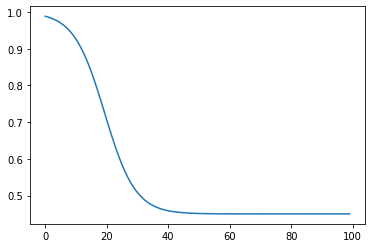

In [106]:
plt.plot (alphas)

In [107]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

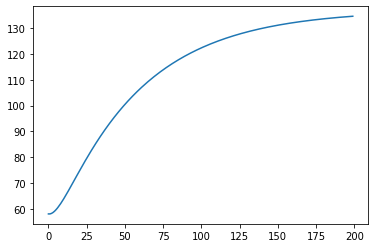

In [143]:
pop = 480609
i0 = I_real[0]
e0 = 0
r0 = R_real[0]
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [109]:
S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)


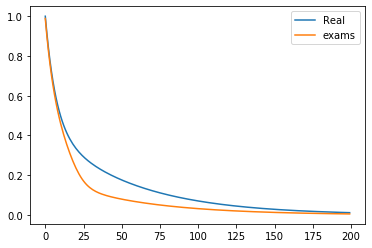

In [110]:
plt.plot(I_c, label = "Real")
plt.plot (I_m, label = "exams")
plt.legend()

In [111]:
t_data = np.arange(len(df.Infectados_Actuales))
I_real = df.Infectados_Actuales.values
R_real = df.Recuperados.values



In [11]:
RMSE, beta, sigma, gamma, a_date, k, a = GridSearchSEIR_exams (t_data, s0, e0, i0, r0, I_real, R_real)

26 26
beta =  1e-09 31.103248119354248
  min =  [264.5587372432549, 1e-09, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]
beta =  1e-08 31.675473928451538
  min =  [264.52915530650176, 1e-08, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]
beta =  1e-07 30.805564165115356
  min =  [264.15908351414464, 1e-07, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]
beta =  1e-06 33.33180594444275
  min =  [241.00166583911252, 1e-06, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]
beta =  1e-05 29.785024881362915
  min =  [241.00166583911252, 1e-06, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]


../src/SEIR_exams.py:28: RuntimeWarning: overflow encountered in double_scalars
  S[step+1] = S[step] + (-beta*I[step]*S[step])*dt
../src/SEIR_exams.py:29: RuntimeWarning: overflow encountered in double_scalars
  E[step+1] = E[step] + (beta*I[step]*S[step] - sigma*E[step])*dt
../src/SEIR_exams.py:28: RuntimeWarning: invalid value encountered in double_scalars
  S[step+1] = S[step] + (-beta*I[step]*S[step])*dt
../src/SEIR_exams.py:29: RuntimeWarning: invalid value encountered in double_scalars
  E[step+1] = E[step] + (beta*I[step]*S[step] - sigma*E[step])*dt
../src/SEIR_exams.py:72: RuntimeWarning: overflow encountered in square
  return np.sqrt(((R_real - R)**2 + (I_real - I)**2).sum()/(len(I))*2)


beta =  0.0001 33.75603699684143
  min =  [241.00166583911252, 1e-06, 0.2, 0.047619047619047616, 25.0, 0.1, 0.75]


In [13]:
print (RMSE, beta, 1./sigma, 1./gamma, a_date, k, a)
print (np.linspace (t_data[0], t_data[-1], 5))

241.00166583911252 1e-06 5.0 21.0 25.0 0.1 0.75
[ 0.    6.25 12.5  18.75 25.  ]


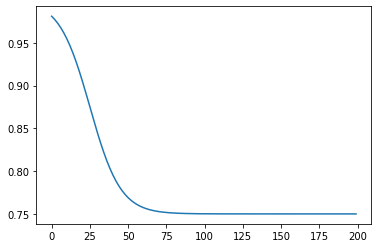

In [14]:
alphas = 1 + (a-1)/(1+np.exp(-k*(ts-a_date)))
plt.plot (alphas)

In [15]:
S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)


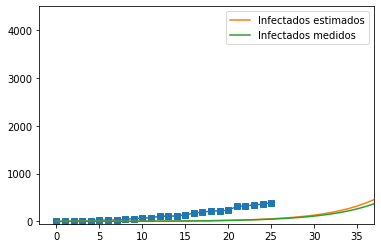

In [16]:
plt.plot(t_data, df.Infectados_Actuales, marker = "s")
plt.plot(I_c, label = "Infectados estimados")
plt.plot (I_m, label = "Infectados medidos")
plt.xlim((-2, 37))
plt.ylim((-50, 4500))
plt.legend()

In [144]:
from scipy.optimize import curve_fit

In [145]:
def SEIR_exams_opt_func (ts, beta, sigma, gamma, a_date, k, a):
    S_c, E_c, I_c, R_c, I_m, R_m = SEIR_exams_backward (ts, s0, e0, i0, r0, beta, sigma, gamma, a_date, k, a)
    return np.concatenate((I_m, R_m)).flatten()

In [146]:
popt, pcov = curve_fit(SEIR_exams_opt_func, t_data, np.concatenate((I_real, R_real)).flatten(), 
                       p0 = [beta, sigma, gamma, a_date, k, a],
                       maxfev=5000, 
                       bounds = ([1e-10, 1./28, 1./28, t_data[0], 0, 0.2], [1e-3, 1./3, 1./3., 500, 1., 1]))

In [147]:
popt

array([1.33630643e-06, 1.28669026e-01, 3.62018323e-02, 1.09834905e+01,
       4.23488020e-01, 2.01568556e-01])

In [148]:
print (beta, sigma, gamma, a_date, k, a)

1e-07 0.06896551724137931 0.08333333333333333 19.3 0.2 0.45


In [149]:
beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o = popt
print (beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o)

1.3363064312516695e-06 0.12866902556670878 0.036201832273380474 10.983490485824754 0.42348801987393186 0.20156855635318907


In [150]:
print (beta_o, 1./sigma_o, 1./gamma_o)

1.3363064312516695e-06 7.771878240280505 27.622911250691274


In [151]:
S_o, E_o, I_o, R_o, I_mo, R_mo = SEIR_exams_backward (ts, s0, e0, i0, r0, beta_o, sigma_o, gamma_o, a_date_o, k_o, a_o)


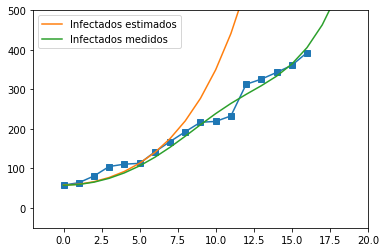

In [152]:
plt.plot(t_data, df.Infectados_Actuales, marker = "s")
plt.plot(I_o, label = "Infectados estimados")
plt.plot (I_mo, label = "Infectados medidos")
plt.xlim((-2, 20))
plt.ylim((-50, 500))
#plt.ylim((-50, 1e6))
plt.legend()

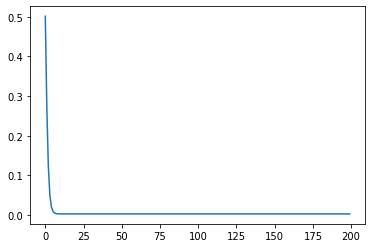

In [120]:
alphas_o = 1 + (a_o-1)/(1+np.exp(-k_o*(ts-a_date_o)))
plt.plot (alphas_o)

In [167]:
i_ini = len(i_data) - len(I_real)
x_plot_data = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in t_data.astype(float)])

x_plot_proy = np.array([df["Fecha_dt"].iloc[0] + datetime.timedelta(days=i) for i in np.arange(len(I_o), dtype = float)])

Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

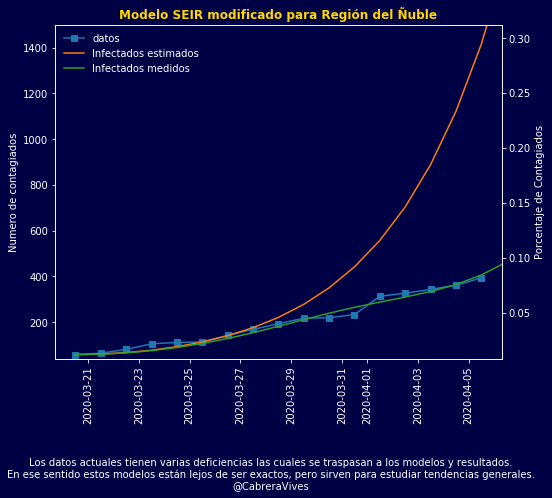

In [195]:
backg_c = "#000044"

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

plt.plot(x_plot, df.Infectados_Actuales, marker = "s", label = "datos")
xlims = ax1.get_xlim()
plt.plot(x_plot_proy, I_o, label = "Infectados estimados")
plt.plot (x_plot_proy, I_mo, label = "Infectados medidos")
#plt.xticks(rotation = 90)
plt.xlim(xlims)
plt.ylim((40, 1500))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble", color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

Text(0.5, 0.1, 'Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives')

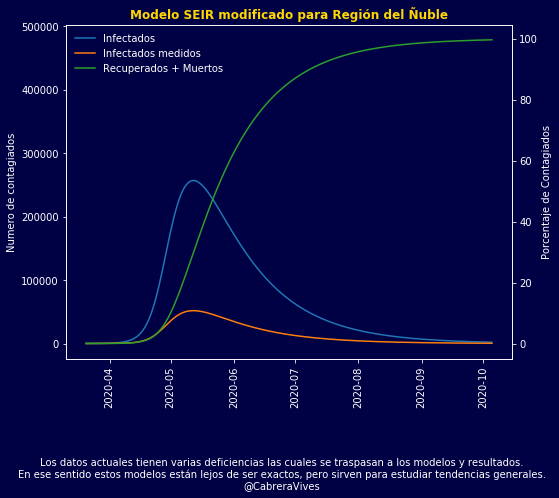

In [197]:
backg_c = "#000044"

fig, ax1 = plt.subplots(figsize = (8, 8))

fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

#plt.plot(x_plot, df.Infectados_Actuales, marker = "s", label = "datos")
#xlims = ax1.get_xlim()
plt.plot(x_plot_proy, I_o, label = "Infectados")
plt.plot (x_plot_proy, I_mo, label = "Infectados medidos")
plt.plot (x_plot_proy, R_o, label = "Recuperados + Muertos")
#plt.xticks(rotation = 90)
#plt.xlim(xlims)
#plt.ylim((0, 500))

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR modificado para Región del Ñuble", color = "gold", weight = "bold")

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ pop*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

[]
[6.65348330e-01 7.65373732e-01 9.12305294e-01 1.11293258e+00
 1.37735405e+00 1.71943681e+00 2.15750993e+00 2.71532238e+00
 3.42331297e+00 4.32025855e+00 5.45538825e+00 6.89107797e+00
 8.70627191e+00 1.10008178e+01 1.39009531e+01 1.75662432e+01
 2.21983501e+01 2.80521132e+01 3.54495461e+01 4.47975146e+01
 5.66100575e+01 7.15365619e+01 9.03973178e+01 1.14228366e+02
 1.44338040e+02 1.82378203e+02 2.30433934e+02 2.91136317e+02
 3.67804107e+02 4.64621368e+02 5.86859761e+02 7.41155944e+02
 9.35856585e+02 1.18144558e+03 1.49107008e+03 1.88118345e+03
 2.37232362e+03 2.99004359e+03 3.76600491e+03 4.73923331e+03
 5.95751356e+03 7.47886502e+03 9.37298371e+03 1.17224568e+04
 1.46234490e+04 1.81854304e+04 2.25293841e+04 2.77838336e+04
 3.40780391e+04 4.15319108e+04 5.02426762e+04 6.02691334e+04
 7.16153430e+04 8.42165703e+04 9.79307700e+04 1.12538511e+05
 1.27752817e+05 1.43238262e+05 1.58636500e+05 1.73593959e+05
 1.87787256e+05 2.00942796e+05 2.12848730e+05 2.23359138e+05
 2.32391649e+05 2.399

NameError: name 'population' is not defined

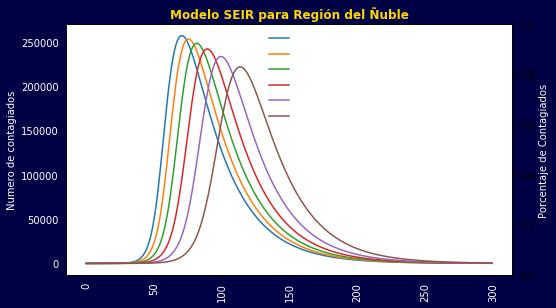

In [215]:
i0_p = i_c[-1]
s0_p = pop - i0
e0_p = e_c[-1]
r0_p = r_c[-1]
x_times_long = x_plot_proy# np.arange(x_times[0], 300, 0.5)

fig, ax1 = plt.subplots(figsize = (8,6))
fig.patch.set_facecolor(backg_c)
fig.subplots_adjust(bottom = 0.3)

#x_plot = np.array([df_c["Fecha_dt"].iloc[i_ini] + datetime.timedelta(days=i) for i in x_times_long])

#percentages = np.array()

for p in np.arange (0., 0.6, 0.1):
    s_cl_p, e_cl_p, i_cl_p, r_cl_p, i_cl_p_m, r_cl_p_m = SEIR_exams_backward(np.arange(300), s0_p, e0_p, i0_p, r0_p, 
                                                                             beta_o*(1-p), sigma_o, gamma_o, 
                                                                             a_date_o, k_o, a_o)
    print (x_plot[len(I_real):])
    print (i_cl_p)
    plt.plot (np.arange(300), i_cl_p, label = str(int(p * 100)) + "% de la población en cuarentena total.")

plt.ylabel ("Numero de contagiados", color = "white")
plt.xticks (rotation = 90, color = "white")
plt.yticks (color = "white")
plt.title ("Modelo SEIR para Región del Ñuble", color = "gold", weight = "bold")

#ax1.set_xlim((ax1.get_xlim()[0], 2* ax1.get_xlim()[1] - ax1.get_xlim()[0]))

leg = plt.legend(framealpha=0)
for text in leg.get_texts():
    plt.setp(text, color = 'w')
    
ax2 = ax1.twinx ()
ax2.set_ylabel ("Porcentaje de Contagiados", color = "white")
ax2.set_ylim (np.array(ax1.get_ylim())/ population*100)

axs = fig.axes
for ax in axs:
    ax.set_facecolor(backg_c)
    ax.tick_params(axis='x', rotation = 90)
    ax.tick_params(colors = "white")
    for sp in ax.spines:
        ax.spines[sp].set_color("white")
        
caption = "Los datos actuales tienen varias deficiencias las cuales se traspasan a los modelos y resultados.\nEn ese sentido estos modelos están lejos de ser exactos, pero sirven para estudiar tendencias generales.\n@CabreraVives"
fig.text(0.5, 0.1, caption, ha='center', va='center', color = "white")

# SCRAPBOOK

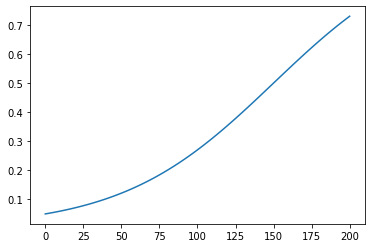

In [50]:
k = 0.02
alpha0 = 100
x = np.linspace (0, 200, 100)
y = sigmoid(x, alpha0, k, b = 0)


plt.plot(x, y)

In [3]:

#We define alpha as: 
I_alpha =i_data/i_c
#where i_data the real data and i_c is the infected evaluated by the SEIR model with respect to time (Days)
#Now we fit I_alpha as a sigmoid function



popt, pcov = curve_fit(sigmoid, x_times, I_alpha, p0, method='dogbox')
#x_times son los datos reales, las fechas
x = np.linspace(0, 30, 19)
alpha = sigmoid(x, *popt)

I = i_c/alpha
print(p0)
print("popt",popt )
plt.plot(x_times,i_data , 'o', label='data')
#alpha no se nota si se plotea con los otros plot, pero si se plotea sola se nota que es un sigmoide
#plt.plot(x,alpha,'-', label='Alpha')
plt.plot(x_times, i_c, label='SEIR')
plt.plot(x_times, I, label='Real')
plt.legend()
plt.show()

NameError: name 'i_data' is not defined

In [12]:
beta = 1e-07
sigma = 1/14.5 
gamma = 1./12.0

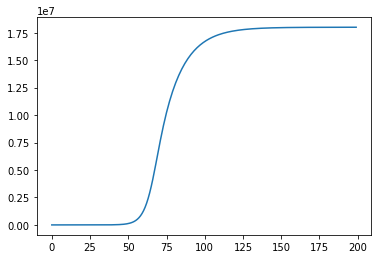

In [46]:
pop = 1.8e7
i0 = 1
e0 = 0
r0 = 0
s0 = pop - i0 - r0 - e0

ts = np.arange (0, 200, 1)
s_c, e_c, i_c, r_c = SEIR_forward(ts, s0, e0, i0, r0, beta, sigma, gamma)

plt.plot (ts, i_c+r_c)


In [183]:
alpha0 = 10000
k = 1e-4
Ex = 5000.
dI = i_c[1:] - i_c[:-1] + r_c[1:] - r_c[:-1]
alpha = (1./(1+np.exp(-(dI-alpha0)*k)))
dIe = Ex*alpha




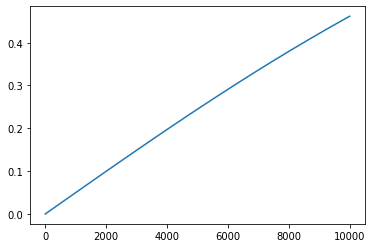

In [184]:
dIs = np.arange(0, 1e4, 10)
alphas = (1./(1+np.exp(-(dIs)*k)))*2 - 1
plt.plot(dIs, alphas)

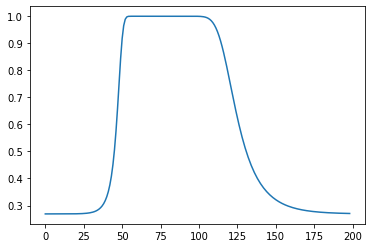

In [185]:
plt.plot(alpha)

(-100, 5100.0)

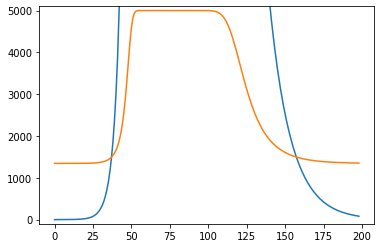

In [190]:
plt.plot(dI)
plt.plot(dIe)
#plt.yscale("log")
plt.ylim((-100, Ex + 100))
#plt.ylim((-10, 50))
#plt.xlim((0, 100))
#plt.axhline(alpha0)
#plt.axhline(alpha0/2)



In [178]:
S_c, E_c, I_c, R_c, I_m = SEIR_exams (ts, s0, e0, i0, r0, beta, sigma, gamma, alpha0, k)


(0, 500)

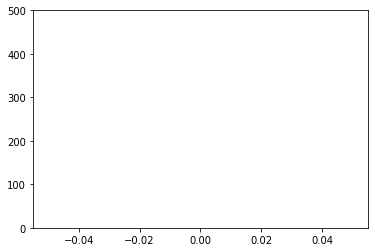

In [17]:
#plt.plot(I_c)
plt.plot(I_m, ls = "--")
plt.ylim ((0, 500))